In [4]:
import jupyter_black
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

jupyter_black.load()

* https://scikit-learn.org/1.4/tutorial/basic/tutorial.html#machine-learning-the-problem-setting
* https://scikit-learn.org/stable/user_guide.html
```
1.1. Linear Models
1.2. Linear and Quadratic Discriminant Analysis
1.3. Kernel ridge regression
1.4. Support Vector Machines
1.5. Stochastic Gradient Descent
1.6. Nearest Neighbors
1.7. Gaussian Processes
1.8. Cross decomposition
1.9. Naive Bayes
1.10. Decision Trees
...
```

* https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

## 1.1 Linear models
* "vanilla" is weak if correlated features
* Ridge -- L2 reg (stable under rotation), has CV version to tune reg parameter $\alpha$
* Lasso - L1 reg (kills more coefficients by setting explicit zeros), also has CV version
* MultiLasso -- lasso for several problems together. advantage: kills coefficient by "rows" instead of independently
* ElasticNet -- L1 and L2 reg mixed, partially rotationally stable, while still "killing off" unnecessary coefficients
* Least Angle Regression (LARS) picks up correlated features on each step, but more noise-sensitive
* bayesian regression -- tunes reg coefficients based on dataa
* Generalized Linear models -- https://en.wikipedia.org/wiki/Generalized_linear_model
* SGD and Perceptron -- more efficient greedy-like optimization algorithms (in particular, Perceptron requires no learning rate and is optimized only on mistakes; also not requires regularization, so can be slightly faster)
* passive aggressive -- even more large scale learning (no need for learning rate, but need to set regularization parameter)
* robustness regression -- regression with outliers, but
> Note that in general, robust fitting in high-dimensional setting (large n_features) is very hard. The robust models here will probably not work in these settings.
* quantile regression
> Quantile regression estimates the median or other quantiles of
conditional on $X$ , while ordinary least squares (OLS) estimates the conditional mean.

> Quantile regression may be useful if one is interested in predicting an interval instead of point prediction. Sometimes, prediction intervals are calculated based on the assumption that prediction error is distributed normally with zero mean and constant variance. Quantile regression provides sensible prediction intervals even for errors with non-constant (but predictable) variance or non-normal distribution.

* polynomial regression ($[x_1,x_2]$ --> $[1,x_1,x_2,x_1^2,x_1x_2,x_2^2]$)

```python
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_
```

* 

In [2]:
# import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
# x = 10 * rng.rand(50)
rng.rand(50)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914,
       0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
       0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041,
       0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
       0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249,
       0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
       0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446])

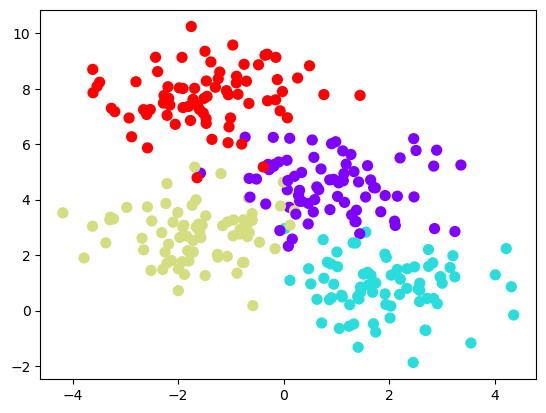

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow");

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X, y)

In [7]:
def visualize_classifier(model, X, y, ax=None, cmap="rainbow"):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(
        X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3
    )
    ax.axis("tight")
    ax.axis("off")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(
        xx,
        yy,
        Z,
        alpha=0.3,
        levels=np.arange(n_classes + 1) - 0.5,
        cmap=cmap,
        clim=(y.min(), y.max()),
        zorder=1,
    )

    ax.set(xlim=xlim, ylim=ylim)

In [9]:
help(plt.contourf)

Help on function contourf in module matplotlib.pyplot:

contourf(*args, data=None, **kwargs)
    Plot filled contours.
    
    Call signature::
    
        contourf([X, Y,] Z, [levels], **kwargs)
    
    `.contour` and `.contourf` draw contour lines and filled contours,
    respectively.  Except as noted, function signatures and return values
    are the same for both versions.
    
    Parameters
    ----------
    X, Y : array-like, optional
        The coordinates of the values in *Z*.
    
        *X* and *Y* must both be 2D with the same shape as *Z* (e.g.
        created via `numpy.meshgrid`), or they must both be 1-D such
        that ``len(X) == N`` is the number of columns in *Z* and
        ``len(Y) == M`` is the number of rows in *Z*.
    
        *X* and *Y* must both be ordered monotonically.
    
        If not given, they are assumed to be integer indices, i.e.
        ``X = range(N)``, ``Y = range(M)``.
    
    Z : (M, N) array-like
        The height values over wh

/var/folders/02/m1j4q6jj79zbjw0qtxcldpnc0000gn/T/ipykernel_5997/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


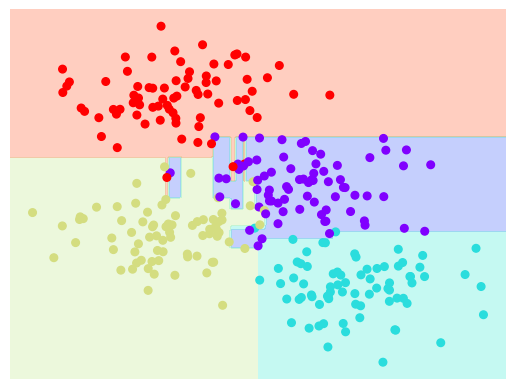

In [8]:
visualize_classifier(DecisionTreeClassifier(), X, y)